In [ ]:
import kaggle
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
%matplotlib inline

d:\laptop_prediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Download latest version
path = kagglehub.dataset_download("ironwolf437/laptop-price-dataset")

print("Path to dataset files:", path)

100%|██████████| 24.5k/24.5k [00:00<00:00, 8.36MB/s]

Extracting files...


Path to dataset files: C:\Users\kiong\.cache\kagglehub\datasets\ironwolf437\laptop-price-dataset\versions\1


In [8]:
#extract the data
data_path="D:\\laptop_prediction\\notebook\\data\\data\\laptop-price-dataset.zip"
with ZipFile(data_path,'r') as zip_ref:
    zip_ref.extractall("data")


In [ ]:

# Set the dataset path
dataset_path = "data/laptop-price-dataset.zip"

# Download the dataset
os.system("kaggle datasets download -d ironwolf437/laptop-price-dataset -p data")

# Extract the dataset
if os.path.exists(dataset_path):
    with ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall("data")
    print("Dataset downloaded and extracted.")
else:
    print("Failed to download the dataset. Check if the Kaggle API command ran successfully.")


Dataset downloaded and extracted.


In [10]:
laptop=pd.read_csv("D:\\laptop_prediction\\notebook\\data\\data\\laptop_price - dataset.csv")

In [11]:
laptop.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [12]:
laptop.shape

(1275, 15)

In [13]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [36]:
laptop.describe(include="all")

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
count,1275,1275,1275,1275.000000,1275,1275,1275,1275.000000,1275.000000,1275,1275,1275,1275,1275.000000,1275.000000
unique,19,618,6,NaN,40,3,93,NaN,NaN,39,4,106,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,NaN,NaN,256GB SSD,Intel,HD Graphics 620,Windows 10,NaN,NaN
freq,291,30,707,NaN,505,1214,193,NaN,NaN,412,704,280,1048,NaN,NaN
mean,NaN,NaN,NaN,15.022902,NaN,NaN,NaN,2.302980,8.440784,NaN,NaN,NaN,NaN,2.040525,1134.969059
std,NaN,NaN,NaN,1.429470,NaN,NaN,NaN,0.503846,5.097809,NaN,NaN,NaN,NaN,0.669196,700.752504
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,0.900000,2.000000,NaN,NaN,NaN,NaN,0.690000,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,1.500000,609.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.500000,8.000000,NaN,NaN,NaN,NaN,2.040000,989.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.700000,8.000000,NaN,NaN,NaN,NaN,2.310000,1496.500000


DATA CLEANING

In [28]:
laptop.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [29]:
#duplicates
laptop.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

1. Univarient analysis

In [42]:
sns.set_style('darkgrid',{"grid.color":"0.6","grid_linestyle":":"})


In [30]:
laptop.head(1)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69


In [85]:
cat=laptop.select_dtypes(include=["float","int64"])
cat

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
0,13.3,2.3,8,1.37,1339.69
1,13.3,1.8,8,1.34,898.94
2,15.6,2.5,8,1.86,575.00
3,15.4,2.7,16,1.83,2537.45
4,13.3,3.1,8,1.37,1803.60
...,...,...,...,...,...
1270,14.0,2.5,4,1.80,638.00
1271,13.3,2.5,16,1.30,1499.00
1272,14.0,1.6,2,1.50,229.00
1273,15.6,2.5,6,2.19,764.00


In [86]:
numerical_columns=[
    "Inches",
    "CPU_Frequency (GHz)",
    "RAM (GB)",
    "Weight (kg)",
    "Price (Euro)"
]

In [88]:
num=laptop[numerical_columns]
num

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
0,13.3,2.3,8,1.37,1339.69
1,13.3,1.8,8,1.34,898.94
2,15.6,2.5,8,1.86,575.00
3,15.4,2.7,16,1.83,2537.45
4,13.3,3.1,8,1.37,1803.60
...,...,...,...,...,...
1270,14.0,2.5,4,1.80,638.00
1271,13.3,2.5,16,1.30,1499.00
1272,14.0,1.6,2,1.50,229.00
1273,15.6,2.5,6,2.19,764.00


In [82]:
categorical_column=[
    	"Company",
        "Product",
        "TypeName",
        "ScreenResolution",
        "CPU_Company",
        "CPU_Type",
        "Memory",
        "GPU_Company",
        "GPU_Type",
        "OpSys"
]

In [83]:
cat_1=laptop[categorical_column]

In [84]:
cat_1

,Company,Product,TypeName,ScreenResolution,CPU_Company,CPU_Type,Memory,GPU_Company,GPU_Type,OpSys
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel,Core i5,128GB SSD,Intel,Iris Plus Graphics 640,macOS
1,Apple,Macbook Air,Ultrabook,1440x900,Intel,Core i5,128GB Flash Storage,Intel,HD Graphics 6000,macOS
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,No OS
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel,Core i7,512GB SSD,AMD,Radeon Pro 455,macOS
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel,Core i5,256GB SSD,Intel,Iris Plus Graphics 650,macOS
...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,128GB SSD,Intel,HD Graphics 520,Windows 10
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,512GB SSD,Intel,HD Graphics 520,Windows 10
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,1366x768,Intel,Celeron Dual Core N3050,64GB Flash Storage,Intel,HD Graphics,Windows 10
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,1366x768,Intel,Core i7 6500U,1TB HDD,AMD,Radeon R5 M330,Windows 10


In [90]:
import sklearn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
num_pipeline= Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='mean')),
        ("scaler",StandardScaler()),
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("Encoder",OneHotEncoder()),
        ("scaler",StandardScaler())

    ]
)

In [55]:
company=laptop['Company'].value_counts().sort_values(ascending=False)

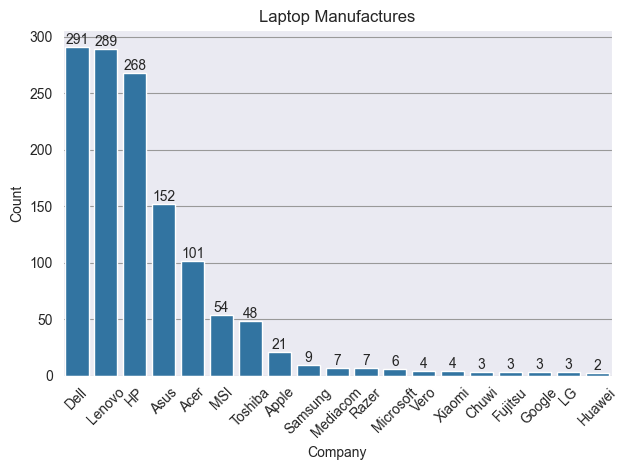

In [58]:
sns.barplot(x=company.index,y=company.values)
plt.xticks(rotation=45,ha="center")
plt.title("Laptop Manufactures")
plt.xlabel("Company")
plt.ylabel("Count")
for index, value in enumerate(company.values):
    plt.text(index, value, str(value), ha='center', va='bottom')  # Adjust label position

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

In [69]:
products=laptop["Product"].value_counts().sort_values(ascending=False)

In [70]:
products

Product
XPS 13                                         30
Inspiron 3567                                  25
250 G6                                         21
Legion Y520-15IKBN                             19
Vostro 3568                                    19
                                               ..
X553SA-XX031T (N3050/4GB/500GB/W10)             1
UX510UX-CN269T (i7-7500U/8GB/256GB              1
V310-15ISK (i3-6006U/4GB/1TB/FHD/W10)           1
FX553VD-FY647T (i7-7700HQ/8GB/256GB/GeForce     1
X541NA (N3350/4GB/1TB/Linux)                    1
Name: count, Length: 618, dtype: int64

In [72]:
enumerate(products.values)

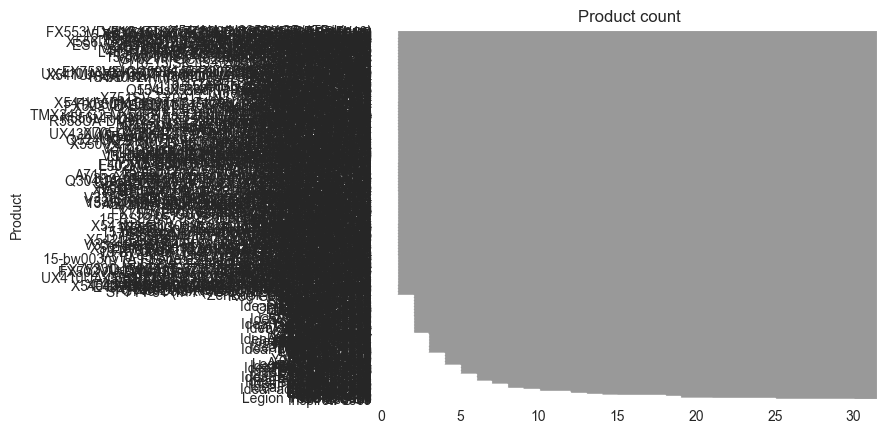

In [78]:
products.plot(kind="barh",title="Product count")
plt.show()

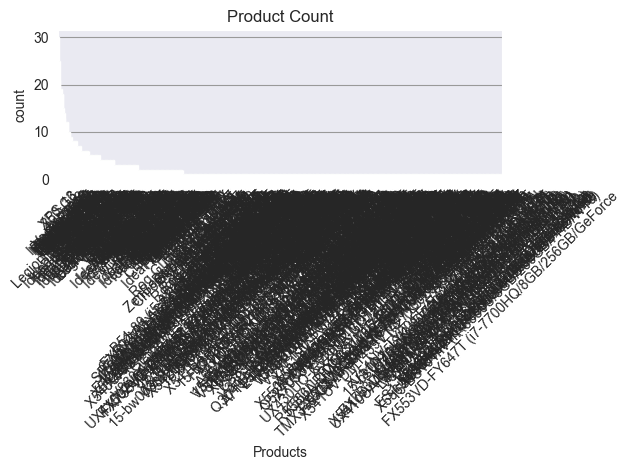

In [79]:
sns.barplot(x=products.index,y=products.values,color="green")
plt.title("Product Count")
plt.xlabel("Products")
plt.ylabel("count")
plt.xticks(rotation=45,ha="center")
# for index, values in enumerate(products.values):
#     plt.text(index,values,str(value),ha="center",va="bottom")

plt.tight_layout()
plt.show()
